# **Heart Attack**

* **Oldpeak**: Oldpeak refers to the depression of the ST segment during exercise relative to rest. It is measured in millimeters and provides information about abnormal changes in the heart's electrical activity during exercise compared to rest. Oldpeak is often used as a predictor of coronary artery disease.
* **Thalassemia**: Thalassemia is a genetic disorder characterized by abnormal hemoglobin production, leading to a reduction in the production of one or more globin chains in hemoglobin. In the dataset context, the 'thal' feature likely represents different types or severities of thalassemia. Common values for 'thal' include normal, fixed defect, and reversible defect.
* **Slope**: Slope refers to the slope of the peak exercise ST segment. It provides information about the rate of change of the ST segment during peak exercise and can indicate the severity of coronary artery disease. The slope can be categorized into three types: upsloping, flat, and downsloping, representing different levels of risk for coronary artery disease.

## **1. Import**

### 1.1. General Library

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics as metrics
from sklearn.model_selection import train_test_split 

In [19]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

In [20]:
import numpy.random as r # We will randomly initialize our weights
from sklearn.metrics import accuracy_score # 

## **2. Preparing Data**

### 2.1. Importing Data

In [21]:
df = pd.read_csv('heart.csv')
data = df.to_numpy()

In [22]:
df.shape

(303, 14)

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
X_data = data[:, :-1]
y_data = data[:, -1]

# Unsupervised analysis

## Plot histograms for numerical features

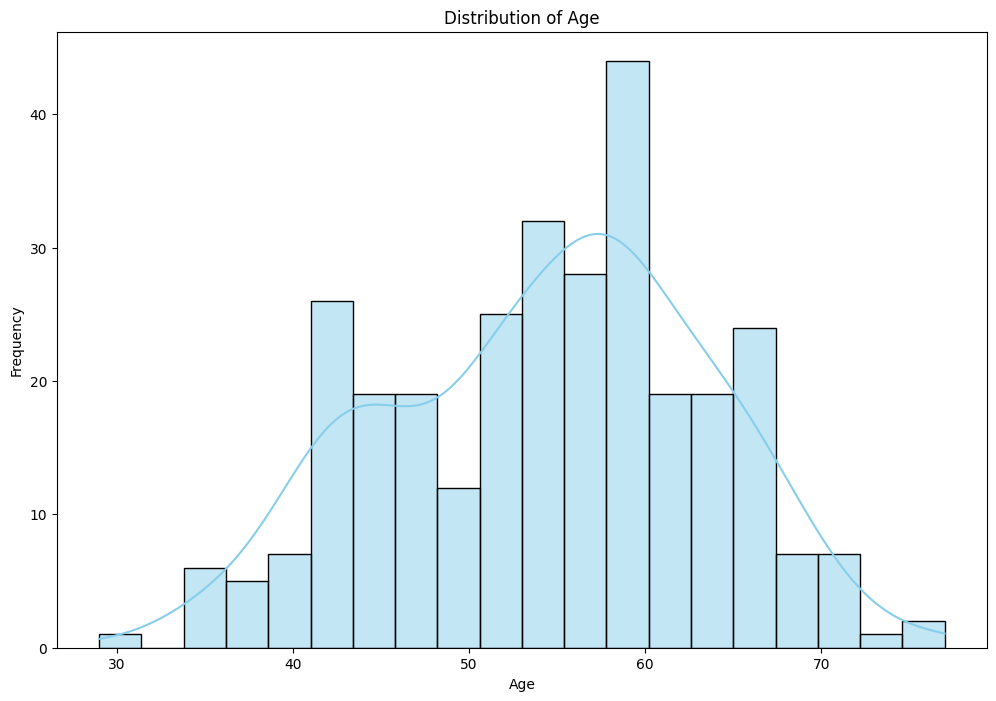

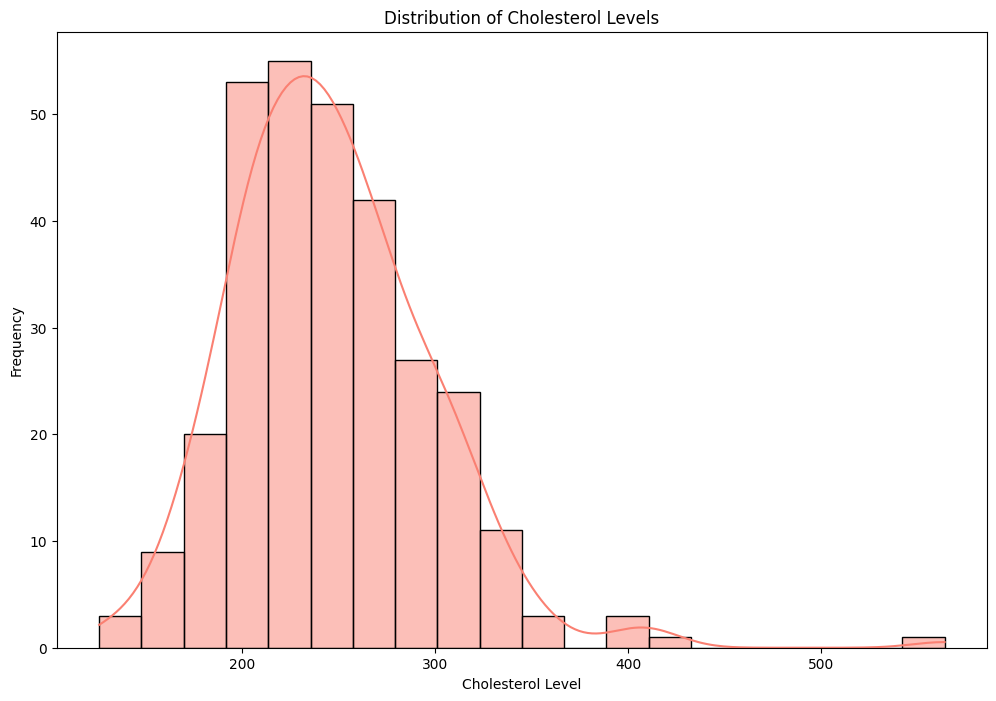

In [25]:
plt.figure(figsize=(12, 8))
sns.histplot(X_data[:, 0], bins=20, kde=True, color='skyblue')  # Assuming 'age' is the first column
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data[:, 4], bins=20, kde=True, color='salmon')  # Assuming 'chol' is the fifth column
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

## Plot bar plot for target variable

/var/folders/bz/7dw6ttj96dd44tddjq_0fpv80000gn/T/ipykernel_48672/1840655160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_data, palette='Set2')  # Assuming 'output' is the last column


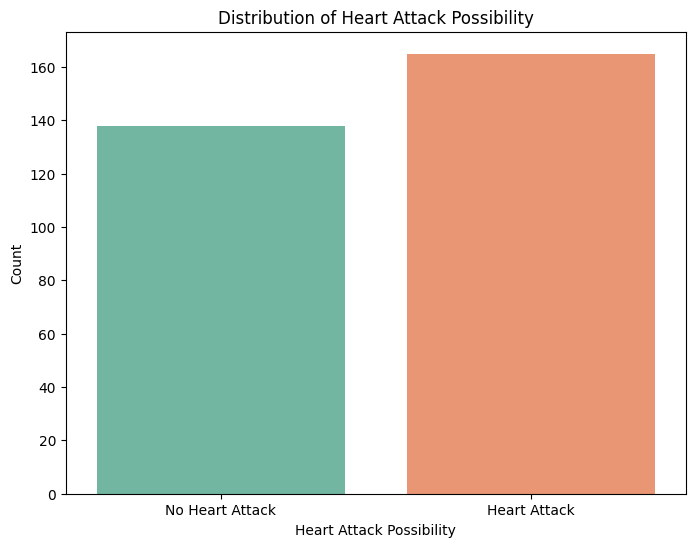

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_data, palette='Set2')  # Assuming 'output' is the last column
plt.title('Distribution of Heart Attack Possibility')
plt.xlabel('Heart Attack Possibility')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Attack', 'Heart Attack'])
plt.show()

## K-means clustering

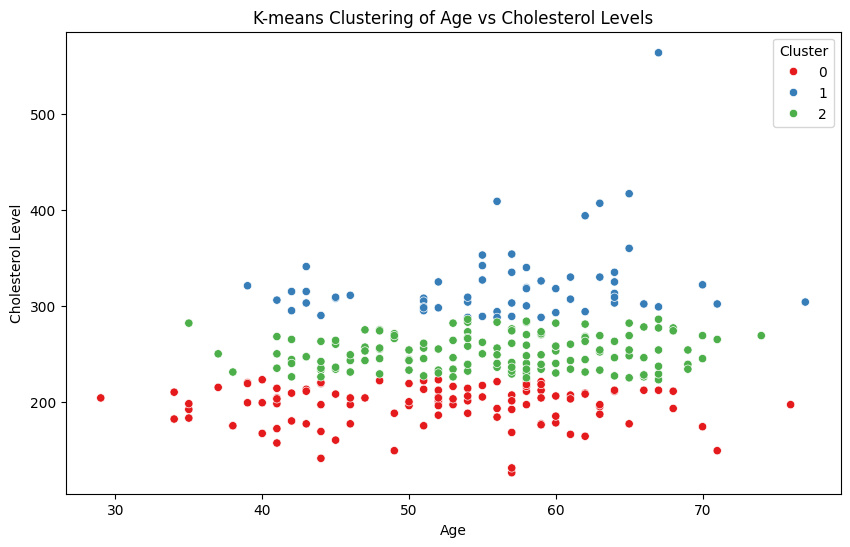

In [27]:
from sklearn.cluster import KMeans

# Select relevant features for clustering (e.g., age and cholesterol levels)
X_age_chol = data[:, [0, 4]]  # 'age' is the first column and 'chol' is the fifth column

# Define the number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_age_chol)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_age_chol[:, 0], y=X_age_chol[:, 1], hue=clusters, palette='Set1', legend='full')
plt.title('K-means Clustering of Age vs Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(title='Cluster')
plt.show()


While using K-means, we notices that the clusters appear to be aligned horizontally, which suggests that the cholesterol level features seem to have a bigger impact than age.

We then realized this might be due to different scales (chol is in the hundreds while age is from 30-70). We then decide to normalize the features before clustering.

### Normalizing features for K-means

In [28]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_data)

X_age_chol_norm = X_normalized[:, [0, 4]]  # 'age' is the first column and 'chol' is the fifth column

### Applying K-means with normalized data

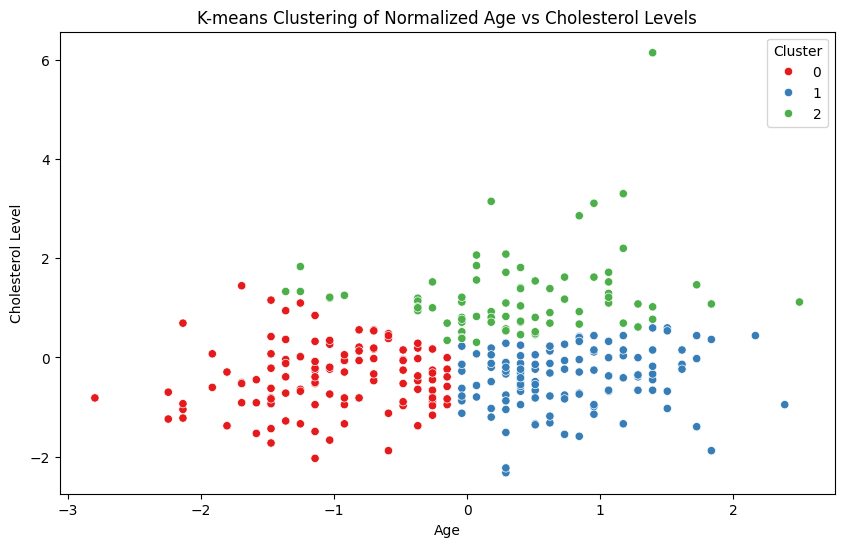

In [29]:
# Apply K-means clustering with specified number of clusters and single initialization
kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
clusters = kmeans.fit_predict(X_age_chol_norm)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_age_chol_norm[:, 0], y=X_age_chol_norm[:, 1], hue=clusters, palette='Set1', legend='full')
plt.title('K-means Clustering of Normalized Age vs Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(title='Cluster')
plt.show()

Even though there is a slight increase in cholesterol level as age increases, most of our data points have about the same cholesterol level (around 200-400), with a few outlier of abnomaly high chol level in the age of 70.

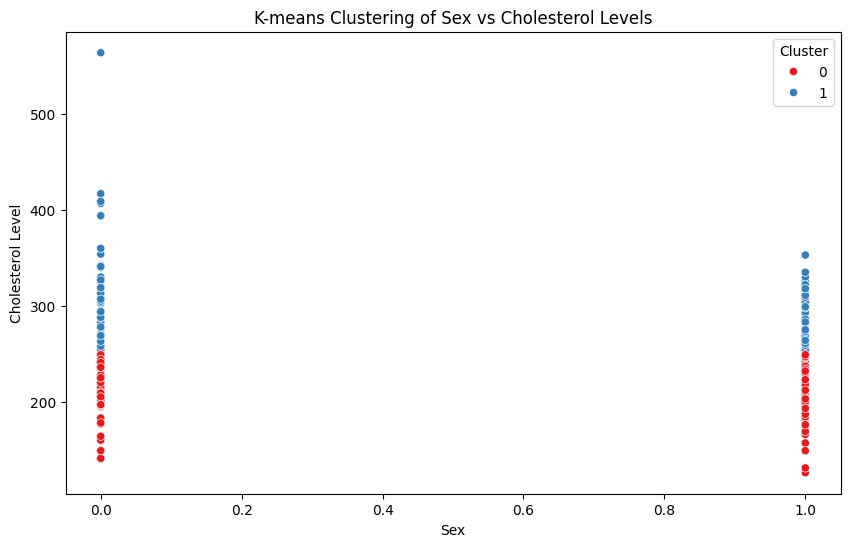

In [30]:
# Visualize the clusters
# Select relevant features for clustering
X_sex_chol = data[:, [1, 4]]  # 'sex' is the second column and 'chol' is the fifth column

# Define the number of clusters (K)
k = 2

# Apply K-means clustering with specified number of clusters and single initialization
kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
clusters = kmeans.fit_predict(X_sex_chol)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_sex_chol[:, 0], y=X_sex_chol[:, 1], hue=clusters, palette='Set1', legend='full')
plt.title('K-means Clustering of Sex vs Cholesterol Levels')
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.legend(title='Cluster')
plt.show()

Men generally have lower cholesterol level

In [31]:
def plot_kmeans(x_feature, y_feature, x_label, y_label, k):
    # Get x,y column indices
    x_ind = df.columns.get_loc(x_feature)
    y_ind = df.columns.get_loc(y_feature)
    
    X_kmeans = X_normalized[:, [x_ind, y_ind]]

    # Apply K-means clustering with specified number of clusters and single initialization
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
    clusters = kmeans.fit_predict(X_kmeans)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_kmeans[:, 0], y=X_kmeans[:, 1], hue=clusters, palette='Set1', legend='full')
    plt.title('K-means Clustering of {} vs {} Levels'.format(x_label, y_label))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title='Cluster')
    plt.show()

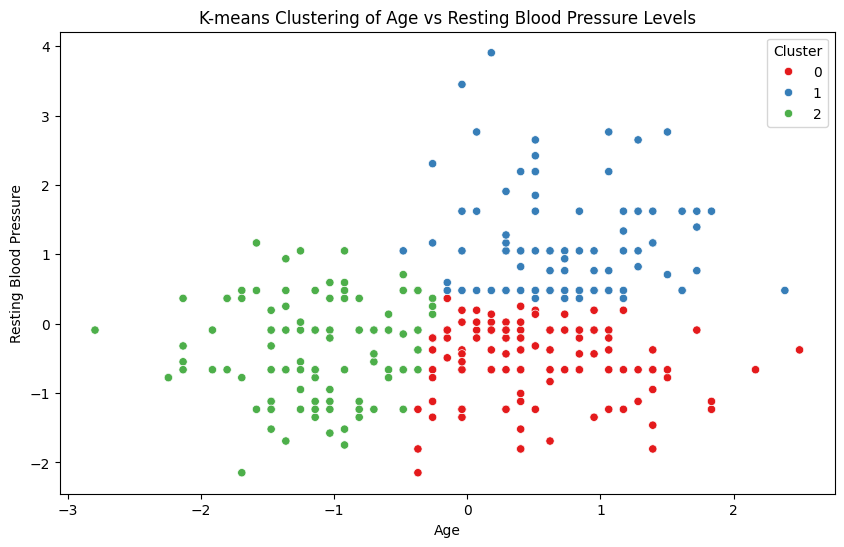

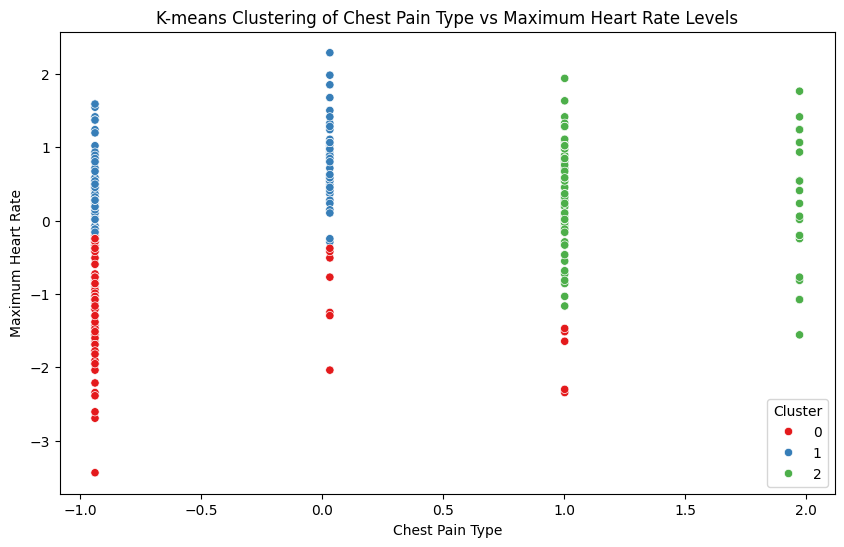

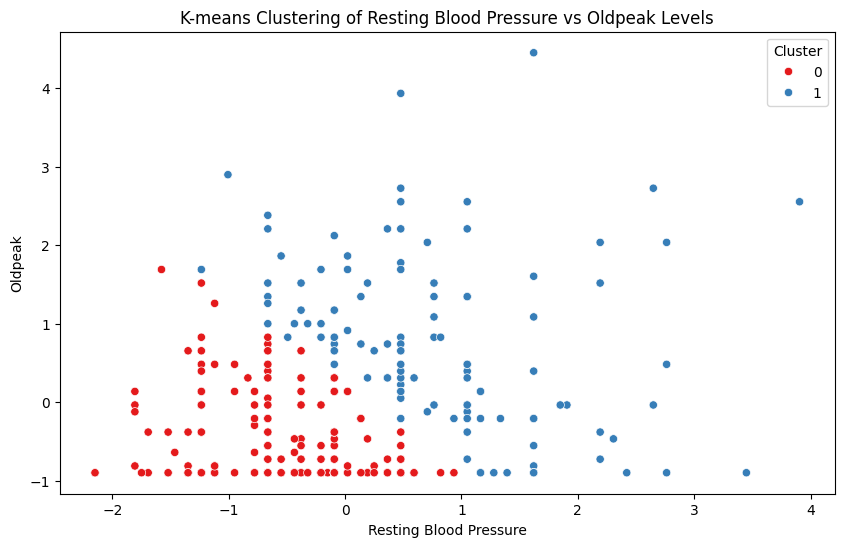

In [32]:
plot_kmeans('age', 'trestbps', 'Age', 'Resting Blood Pressure', 3)
plot_kmeans('cp', 'thalach', 'Chest Pain Type', 'Maximum Heart Rate', 3)
plot_kmeans('trestbps', 'oldpeak', 'Resting Blood Pressure', 'Oldpeak', 2)

## **3. Model 1: Logistic Regression**

### **3.1. Without Regularization**

#### 3.1.1 Splitting Data
We divide our dataset into a training set and a testing set:
- **Training Set**: 80%
- **Testing Set**: 20%

Use the `train_test_split` function to achieve this split:
- Assign results to: `X_train`, `X_test`, `y_train`, `y_test`
- Set `random_state` to 42 to ensure reproducibility.


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

#### 3.1.2. Processing Data

##### 3.1.2.1. Scaling the Data Using Standard Scaler

In [34]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler() # Reshape `y_train` into 2D array, and `y_test` into 2D array 
y_2d_train = np.reshape(y_train, (-1, 1))
y_2d_test = np.reshape(y_test, (-1, 1))
X_train_unscaled = X_train
X_test_unscaled = X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### 3.1.2.2. Adding a Bias Term to Design Matrix $X_{\text{train}}$ and $X_{\text{test}}$
To account for the intercept term in our logistic regression model, we augment our feature matrices with a column of ones. This is often referred to as the bias term.


In [37]:
ones = np.ones((X_train.shape[0], 1))
X_train_1 = np.hstack((ones,X_train))

In [38]:
X_train_1.shape

(242, 14)

##### 3.1.2.3. Initialize w

In [39]:
w_init = np.zeros((X_train_1.shape[1], 1))

In [40]:
w_init.shape

(14, 1)

#### 3.1.3. Sigmoid(z)

$$\sigma (z) = \frac{1}{1 + e^{-z}}$$

In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### 3.1.4. Prediction Function

$$ h(x) = \frac{1}{1 + e^{-(w_0+w_1x_1+w_2x_2+...+w_dx_d)}} $$

$$ h(x) = \frac{1}{1 + e^{-Xw}} $$

In [42]:
def hypothesis(X, w):
    return sigmoid(np.dot(X, w))

In [43]:
y_hat_init = hypothesis(X_train_1, w_init)
y_hat_init.shape

(242, 1)

#### 3.1.5. Log_likelihood Function

$$ l(w) = \sum_{i=1}^{N} y^{(i)}ln(h(x^{(i)})) + (1 - y^{(i)})ln(1 - h(x^{(i)})) $$

In [44]:
def log_likelihood(X, y, w):
    y_hat = hypothesis(X, w)
    return np.dot(y.T, np.log(1-y_hat)) + np.dot((1-y).T, np.log(y_hat))

y_2d_train.shape, hypothesis(X_train_1, w_init).shape

((242, 1), (242, 1))

In [45]:
log_likelihood(X_train_1, y_2d_train, w_init)

array([[-167.7416177]])

#### 3.1.6. Gradient Ascent

In [46]:
def gradient_ascent(X, y, learning_rate, num_iters):
    N = X.shape[0]
    w = np.zeros((X.shape[1], 1))
    
    log_likelihood_values = []
    X_transpose = np.transpose(X)

    # Gradient Ascent - local optimization technique
    i = 0
    while i < num_iters:
        w += (learning_rate / N) * (X_transpose @ (y - hypothesis(X, w)))
        i += 1

        # Computing log likelihood of seeing examples for current value of w
        if (i % 10) == 0:
            log_likelihood_values.append(log_likelihood(X, y, w))

    return w, log_likelihood_values

In [47]:
learning_rate = 0.0000001
num_iters = 100000
w, log_likelihood_values = gradient_ascent(X_train_1, y_2d_train, learning_rate, num_iters)
w, log_likelihood_values

(array([[ 4.95248445e-04],
        [-1.15817901e-03],
        [-1.50969379e-03],
        [ 2.02291593e-03],
        [-5.16964627e-04],
        [-2.85928173e-04],
        [-4.23626500e-06],
        [ 4.17035130e-04],
        [ 1.95008763e-03],
        [-2.19783051e-03],
        [-2.21782539e-03],
        [ 1.69333416e-03],
        [-1.86249814e-03],
        [-1.67700686e-03]]),
 [array([[-167.74169364]]),
  array([[-167.74176959]]),
  array([[-167.74184554]]),
  array([[-167.74192149]]),
  array([[-167.74199744]]),
  array([[-167.74207338]]),
  array([[-167.74214933]]),
  array([[-167.74222528]]),
  array([[-167.74230123]]),
  array([[-167.74237717]]),
  array([[-167.74245312]]),
  array([[-167.74252907]]),
  array([[-167.74260502]]),
  array([[-167.74268097]]),
  array([[-167.74275691]]),
  array([[-167.74283286]]),
  array([[-167.74290881]]),
  array([[-167.74298476]]),
  array([[-167.74306071]]),
  array([[-167.74313665]]),
  array([[-167.7432126]]),
  array([[-167.74328855]]),
  arr

#### 3.1.7. Predict the Class Label

In [48]:
def predict_class(X, w, t = 0.5):
    p = hypothesis(X, w)
    p_class = np.zeros(p.shape)  
    p_class[p >= t] = 1
    return p_class

#### 3.1.8. Evaluating our hypothesis using the test dataset

In [118]:
t = 0.5
# First augment the test dataset with a column of ones.
ones = np.ones((X_test.shape[0], 1))
X_test_1 = np.hstack((ones, X_test))
# Now predict the label of each example in your test set
y_hat = predict_class(X_test_1, w, t)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<Axes: >

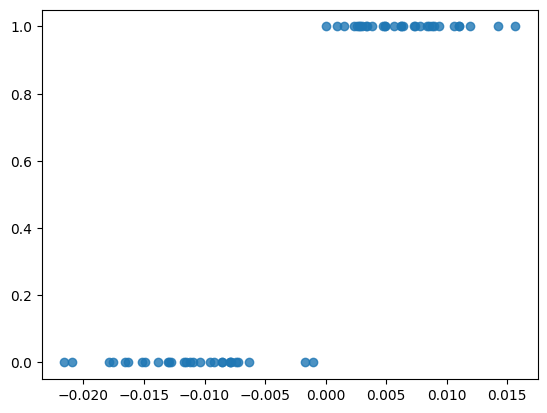

In [119]:
sns.regplot(x=np.dot(X_test_1, w), y=y_hat, data=data, logistic=True, ci=None)

#### 3.1.9. Precision, Recall and F1 Scores

##### 3.1.9.1. Precision and Recall

In [120]:
def precision_recall(y_hat, y):
    
    # Calculate false positive and false negative
    # HINT: if done correctly, false_pos should be 1 and false_neg should be 1
    false_pos = np.count_nonzero((y - y_hat) < 0)
    false_neg = np.count_nonzero((y - y_hat) > 0)

    # Calculate true positive and true negatives
    # HINT: if done correctly, true_pos should be 88
    true_pos = np.count_nonzero((y * y_hat) == 1)

    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    return precision,recall

In [121]:
prec, rec = precision_recall(y_hat, y_2d_test)

##### 3.1.9.2. F1

In [122]:
def f1(precision, recall):
    if precision + recall > 0:
        return 2 * (precision * recall) / (precision + recall)
    return 0

In [123]:
f1_score = f1(prec, rec)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1 Score: ', f1_score)

Precision:  0.875
Recall:  0.875
F1 Score:  0.875


#### Accuracy

In [124]:
def accuracy(y_hat, y):
    correct = np.count_nonzero((y == y_hat))
    return correct / y.shape[0]

In [125]:
acc = accuracy(y_hat, y_2d_test)
print('Accuracy: ', acc)

Accuracy:  0.8688524590163934


##### 3.1.9.3. Confusion Matrix

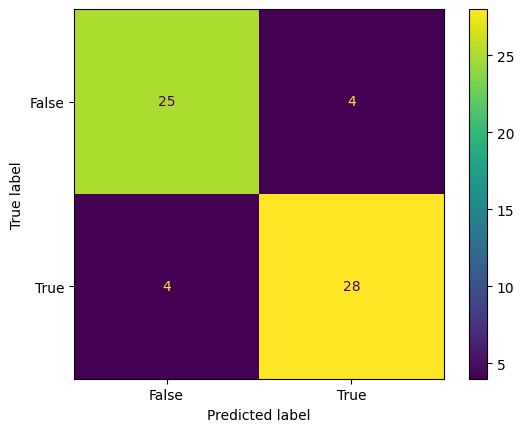

In [126]:
cm = metrics.confusion_matrix(y_2d_test, y_hat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

### **3.2. Adding L1 Regularization**

#### Sklearn's implementation of Logistic regression

In [127]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(penalty=None)

# Fit the model
logreg.fit(X_train, y_train)

w_logreg = logreg.coef_
intercept_logreg = logreg.intercept_

##### Performance measure: Accuracy

In [128]:
# Find the predicted values on test set (X_test not X_test_1) using logreg.predict
y_hat_logreg = logreg.predict(X_test)

# Find the accuracy achieved on test set using logreg.score and y_test 
acc_logreg = logreg.score(X_test, y_test)

print("Accuracy on training data = %f" % acc_logreg)

Accuracy on training data = 0.852459


##### Performance Metrics: precision, recall, F1 score

In [129]:
from sklearn.metrics import precision_recall_fscore_support
prec, recal, fscore, sup = precision_recall_fscore_support(y_test, y_hat_logreg)
print('Precision:', prec)
print('Recall: ', recal)
print('F1 Score: ', fscore)

Precision: [0.83333333 0.87096774]
Recall:  [0.86206897 0.84375   ]
F1 Score:  [0.84745763 0.85714286]


In [130]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV


# Initialize LogisticRegressionCV with 5-fold cross-validation and Lasso regularization
logreg_cv_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5)

# Fit the model to the training data
logreg_cv_l1.fit(X_train, y_train)
w_logreg_cv_l1 = logreg_cv_l1.coef_
intercept_logreg_cv_l1 = logreg_cv_l1.intercept_

# Get the optimal λ value
optimal_lambda_l1 = 1/ (logreg_cv_l1.C_[0])
y_hat_logreg_cv_l1 = logreg_cv_l1.predict(X_test)
# Find the accuracy achieved on test set using logreg.score and y_test 
acc_valid_logreg_cv_l1 = logreg_cv_l1.score(X_test, y_test)
acc_train_logreg_cv_l1 = logreg_cv_l1.score(X_train, y_train)
acc_valid_logreg = logreg.score(X_test, y_test)
acc_train_logregv = logreg.score(X_train, y_train)

print("Using Lasso Regression")
print("Reg - Optimal λ:", optimal_lambda_l1)
print("Reg - Accuracy on validation data = %f" % acc_valid_logreg_cv_l1)
print("Reg - Accuracy on training data = %f" % acc_train_logreg_cv_l1)
print("No reg - Accuracy on validation data = %f" % acc_valid_logreg)
print("No reg - Accuracy on training data = %f" % acc_train_logregv)

Using Lasso Regression
Reg - Optimal λ: 0.3593813663804626
Reg - Accuracy on validation data = 0.852459
Reg - Accuracy on training data = 0.863636
No reg - Accuracy on validation data = 0.852459
No reg - Accuracy on training data = 0.863636


### **3.3. Adding L2 Regularization**

In [131]:
# Initialize LogisticRegressionCV with 5-fold cross-validation and ridge regularization
logreg_cv_l2 = LogisticRegressionCV(penalty='l2', cv=5)

# Fit the model to the training data
logreg_cv_l2.fit(X_train, y_train)
w_logreg_cv_l2 = logreg_cv_l2.coef_
intercept_logreg_cv_l2 = logreg_cv_l2.intercept_

# Get the optimal λ value
optimal_lambda_l2 = 1/ (logreg_cv_l2.C_[0])
y_hat_logreg_cv_l2 = logreg_cv_l2.predict(X_test)
# Find the accuracy achieved on test set using logreg.score and y_test 
acc_valid_logreg_cv_l2 = logreg_cv_l2.score(X_test, y_test)
acc_train_logreg_cv_l2 = logreg_cv_l2.score(X_train, y_train)

print("Using Ridge Regression")
print("Reg - Optimal λ:", optimal_lambda_l2)
print("Reg - Accuracy on validation data = %f" % acc_valid_logreg_cv_l2)
print("Reg - Accuracy on training data = %f" % acc_train_logreg_cv_l2)
print("No reg - Accuracy on validation data = %f" % acc_valid_logreg)
print("No reg - Accuracy on training data = %f" % acc_train_logregv)

Using Ridge Regression
Reg - Optimal λ: 0.3593813663804626
Reg - Accuracy on validation data = 0.852459
Reg - Accuracy on training data = 0.863636
No reg - Accuracy on validation data = 0.852459
No reg - Accuracy on training data = 0.863636


Both Lasso (L1 regularization) and Ridge (L2 regularization) regression models yield the same optimal λ value and accuracy scores for both validation and training datasets.

They both don't have any effect on the accuracy versus when there isn't regularization.

## Comparision between with vs. without Regularization

### Plotting confusion matrix

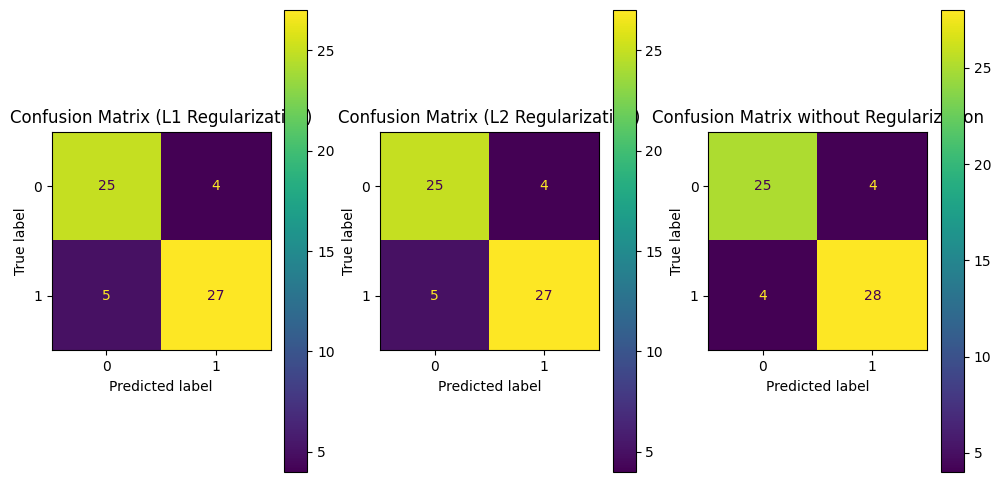

In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plotting confusion matrix
cm_l1 = confusion_matrix(y_test, y_hat_logreg_cv_l1)
cm_l2 = confusion_matrix(y_test, y_hat_logreg_cv_l2)

disp_noreg = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_l1 = ConfusionMatrixDisplay(confusion_matrix=cm_l1)
disp_l2 = ConfusionMatrixDisplay(confusion_matrix=cm_l2)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
disp_l1.plot(ax=ax[0])
ax[0].set_title('Confusion Matrix (L1 Regularization)')
disp_l2.plot(ax=ax[1])
ax[1].set_title('Confusion Matrix (L2 Regularization)')
disp_noreg.plot(ax=ax[2])
ax[2].set_title('Confusion Matrix without Regularization')
plt.show()

### Feature Transformation: Polynomial

#### Degree of 2

In [133]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_reg_2.fit_transform(X_train_1)
print("X_poly_2.shape: ", X_poly_2.shape)

X_poly_2.shape:  (242, 120)


In [134]:
w_init_poly_2 = np.zeros((X_poly_2.shape[1], 1))

In [135]:
y_hat_poly_2 = hypothesis(X_poly_2, w_init_poly_2)
y_hat_poly_2.shape

(242, 1)

In [140]:
learning_rate = 0.0000001
num_iters = 100000
w_poly_2, log_likelihood_values_poly_2 = gradient_ascent(X_poly_2, y_2d_train, learning_rate, num_iters)

In [141]:
t = 0.5
ones = np.ones((X_test.shape[0], 1))
X_test_poly_2 = poly_reg_2.fit_transform(np.hstack((ones, X_test)))
y_hat_poly_2 = predict_class(X_test_poly_2, w_poly_2, t)

<Axes: >

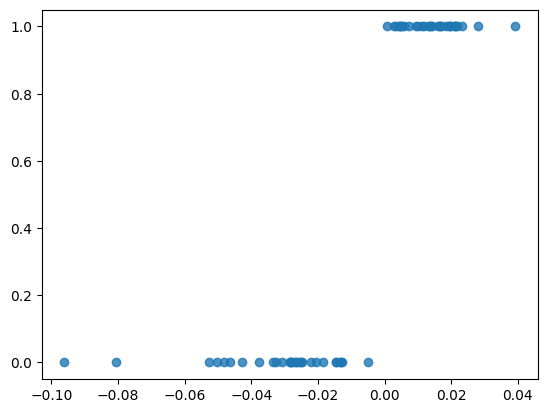

In [142]:
sns.regplot(x=np.dot(X_test_poly_2, w_poly_2), y=y_hat_poly_2, data=data, logistic=True, ci=None)

In [143]:
precision_poly_2, recall_poly_2 = precision_recall(y_hat_poly_2, y_2d_test)
f1_poly_2 = f1(precision_poly_2, recall_poly_2)
acc = accuracy(y_hat_poly_2, y_2d_test)
print('Precision: ', precision_poly_2)
print('Recall: ', recall_poly_2)
print('F1 Score: ', f1_poly_2)
print('Accuracy: ', acc)

Precision:  0.90625
Recall:  0.90625
F1 Score:  0.90625
Accuracy:  0.9016393442622951


#### Degree of 5 Not Done

In [144]:
poly_reg_5 = PolynomialFeatures(degree=5)
X_poly_5 = poly_reg_5.fit_transform(X_train_1)
print("X_poly_5.shape: ", X_poly_5.shape)

X_poly_5.shape:  (242, 11628)


In [145]:
w_init_poly_5 = np.zeros((X_poly_5.shape[1], 1))

In [146]:
y_hat_poly_5 = hypothesis(X_poly_5, w_init_poly_5)
y_hat_poly_5.shape

(242, 1)

In [ ]:
Very Slow

In [ ]:
learning_rate = 0.0000001
num_iters = 100000
w_poly_5, log_likelihood_values_poly_5 = gradient_ascent(X_poly_5, y_2d_train, learning_rate, num_iters)

/var/folders/bz/7dw6ttj96dd44tddjq_0fpv80000gn/T/ipykernel_48672/1264073204.py:3: RuntimeWarning: divide by zero encountered in log
  return np.dot(y.T, np.log(1-y_hat)) + np.dot((1-y).T, np.log(y_hat))


In [ ]:
sns.regplot(x=np.dot(X_test_poly_2, w_poly_2), y=y_hat_poly_2, data=data, logistic=True, ci=None)